<a href="https://colab.research.google.com/github/csd-oss/vc-investmemt/blob/master/VC_Investment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# General preparation and GDrive conection

In [0]:
import pandas as pd 
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Uploiding info from [OECD](https://stats.oecd.org/Index.aspx?DataSetCode=VC_INVEST#)

In [0]:
vc_path = "/content/drive/My Drive/data/VC_INVEST_04042020151626788.csv"
df = pd.read_csv(vc_path)
df

,LOCATION,Country,SUBJECT,Subject,STAGES,Development stages,MEASURE,Measure,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,VC_INV,Venture capital investments,VC_T,Total,USD_V,"USD, current prices",2006,2006,USD,US Dollar,6,Millions,NaN,NaN,456.334579,NaN,NaN
1,AUS,Australia,VC_INV,Venture capital investments,VC_T,Total,USD_V,"USD, current prices",2007,2007,USD,US Dollar,6,Millions,NaN,NaN,680.293170,NaN,NaN
2,AUS,Australia,VC_INV,Venture capital investments,VC_T,Total,USD_V,"USD, current prices",2008,2008,USD,US Dollar,6,Millions,NaN,NaN,755.759626,NaN,NaN
3,AUS,Australia,VC_INV,Venture capital investments,VC_T,Total,USD_V,"USD, current prices",2009,2009,USD,US Dollar,6,Millions,NaN,NaN,532.682779,NaN,NaN
4,AUS,Australia,VC_INV,Venture capital investments,VC_T,Total,USD_V,"USD, current prices",2010,2010,USD,US Dollar,6,Millions,NaN,NaN,367.836251,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2773,ZAF,South Africa,VC_INV,Venture capital investments,VC_T,Total,SH_GDP,Percentage share of GDP,2013,2013,PC,Percentage,0,Units,NaN,NaN,0.043910,NaN,NaN
2774,ZAF,South Africa,VC_INV,Venture capital investments,VC_T,Total,SH_GDP,Percentage share of GDP,2014,2014,PC,Percentage,0,Units,NaN,NaN,0.068672,NaN,NaN
2775,ZAF,South Africa,VC_INV,Venture capital investments,VC_T,Total,SH_GDP,Percentage share of GDP,2015,2015,PC,Percentage,0,Units,NaN,NaN,0.027779,NaN,NaN
2776,ZAF,South Africa,VC_INV,Venture capital investments,VC_T,Total,SH_GDP,Percentage share of GDP,2016,2016,PC,Percentage,0,Units,NaN,NaN,0.043736,NaN,NaN


## Droping all not needed info

In [0]:
df = df.drop(columns=["Reference Period Code","Reference Period","Flag Codes","Flags","SUBJECT","Measure","Unit","Year","Subject","SUBJECT","Development stages"])
df

,LOCATION,Country,STAGES,MEASURE,TIME,Unit Code,PowerCode Code,PowerCode,Value
0,AUS,Australia,VC_T,USD_V,2006,USD,6,Millions,456.334579
1,AUS,Australia,VC_T,USD_V,2007,USD,6,Millions,680.293170
2,AUS,Australia,VC_T,USD_V,2008,USD,6,Millions,755.759626
3,AUS,Australia,VC_T,USD_V,2009,USD,6,Millions,532.682779
4,AUS,Australia,VC_T,USD_V,2010,USD,6,Millions,367.836251
...,...,...,...,...,...,...,...,...,...
2773,ZAF,South Africa,VC_T,SH_GDP,2013,PC,0,Units,0.043910
2774,ZAF,South Africa,VC_T,SH_GDP,2014,PC,0,Units,0.068672
2775,ZAF,South Africa,VC_T,SH_GDP,2015,PC,0,Units,0.027779
2776,ZAF,South Africa,VC_T,SH_GDP,2016,PC,0,Units,0.043736


## Deviding data into 2 dataframes

In [0]:
df_usd = df.query('MEASURE == "USD_V"')
df_gdp = df.query('MEASURE == "SH_GDP"')

# Playing with USD data

## Creating filters

In [0]:
filt_total_us = (df_usd['STAGES'] == "VC_T") & (df['LOCATION']== "USA")
filt_seed_us = (df_usd['STAGES'] == "SEED") & (df['LOCATION']== "USA")
filt_start_us = (df_usd['STAGES'] == "START") & (df['LOCATION']== "USA")
filt_later_us = (df_usd['STAGES'] == "LATER") & (df['LOCATION']== "USA")


## Ploting US VC data 

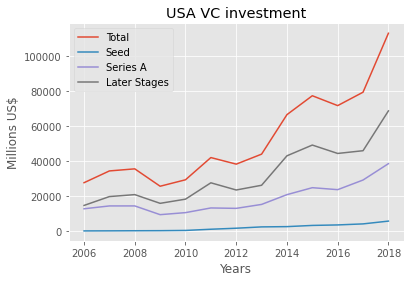

In [0]:
plt.style.use("ggplot")
plt.plot(df_usd.loc[filt_total_us].TIME, df_usd.loc[filt_total_us].Value, label = "Total")
plt.plot(df_usd.loc[filt_seed_us].TIME, df_usd.loc[filt_seed_us].Value, label = "Seed")
plt.plot(df_usd.loc[filt_start_us].TIME, df_usd.loc[filt_start_us].Value, label = "Series A")
plt.plot(df_usd.loc[filt_later_us].TIME, df_usd.loc[filt_later_us].Value, label = "Later Stages")

plt.xlabel("Years")
plt.ylabel("Millions US$")
plt.title("USA VC investment")
plt.grid(True)
plt.legend()
plt.show()